Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "XAVIER MALTAS TARRIDAS"
COLLABORATORS = "OSCAR BUISAN VINIEGRA"

---

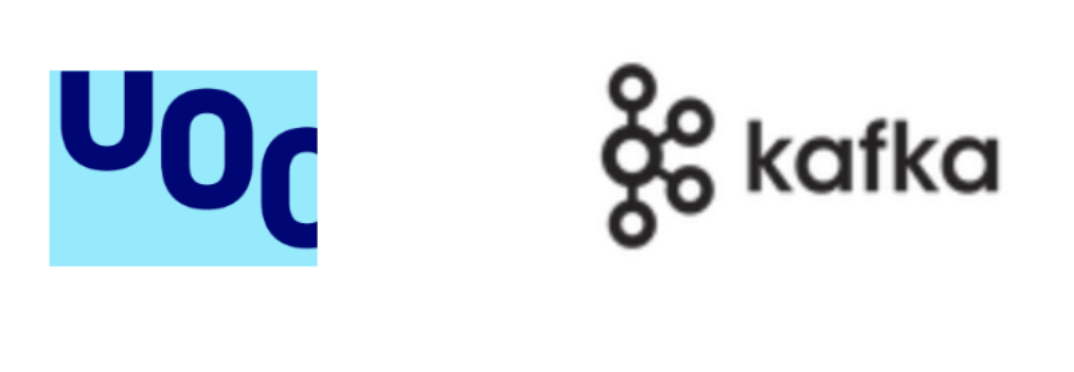

# Activitat: Captura i emmagatzematge: Kafka
## (Puntuació: 30% de l'Activitat Kafka)

**Nota**
En alguns dels exercicis s'hauran de fer **captures de pantalla que justifiquin les respostes**. Les captures de pantalla es poden fer amb les eines del sistema operatiu que estigueu utilitzant. Per copiar la imatge al porta-retalls podeu utilitzar diferents mètodes: "Eina de Talls" en Windows, "Imprimir pantalla", Ctrl+C en seleccionar una imatge, etc... Les imatges un cop capturades es poden enganxar directament a les cel·les de resposta, mitjançant Ctrl+V o amb el menú contextual que apareix amb el botó dret del ratolí, la qual cosa enganxarà la imatge que estigui al porta-retalls. Per veure la imatge, s'ha d'executar la cel·la.

# 1. Introducció

En aquesta activitat explorarem una altra de les tecnologies més importants en l'àmbit de l'anàlisi de dades en temps real: Kafka, que permet capturar fluxos de dades en temps real, així com processar informació en el procés de la captura de manera senzilla.

# 2. Captura d'informació en streaming mitjançant Kafka.

[Kafka](https://kafka.apache.org) és una plataforma distribuïda per gestionar esdeveniments en streaming, que ens permet llegir, escriure i processar esdeveniments (registres o missatges segons Kafka) distribuïts en un clúster.

Començarem l'activitat creant un tòpic anomenat `PEC5<usuari>` al servei Kafka del nostre clúster (heu de substituir "usuari" pel vostre nom d'usuari). Un tòpic és una col·lecció ordenada d'esdeveniments que s'emmagatzema de manera persistent, normalment en disc, de manera distribuïda i replicada. Kafka tracta cada tòpic de cada partició com un registre (un conjunt ordenat de missatges). Cada missatge en una partició té assignat un únic desplaçament (offset) i aquests missatges tenen un període de retenció per defecte de 7 dies (604,800,000 ms), però es pot canviar en el moment de la creació del tema.

Kafka treballa utilitzant el [Zookeeper](https://zookeeper.apache.org), que es fa càrrec de la gestió de clústers amb la finalitat de proporcionar un servei de coordinació per a aplicacions distribuïdes. Es troba al mateix servidor al qual us connecteu, és a dir, a "localhost", i el seu port és el 2181. Els brokers de Kafka són "Cloudera02 i Cloudera03" i són accessibles al port habitual 9092.

**IMPORTANT: Per qüestions d'organització i estabilitat del servidor, és important que no creeu cap tòpic diferent del que s'ha demanat, amb el vostre nom d'usuari. Qualsevol altre tòpic serà eliminat.**

**IMPORTANT: Per realitzar aquesta activitat, heu de fer-ho mitjançant SSH des de la terminal o VSCODE i adjuntar només el codi resultant en aquest mateix NOTEBOOK, sempre en aquest fitxer notebook (ipynb).**

**Pregunta 1. (1 punt)** Crea un tòpic Kafka anomenat `PEC5<usuari>` al nostre clúster, amb un factor de rèplica de 1 i una única partició, és a dir, utilitzarem només un node per emmagatzemar els missatges que rep Kafka. A més, especificarem que els missatges només s'emmagatzemin durant 2 hores al tema.

In [ ]:
#Topic creation
kafka-topics --create --zookeeper localhost:2181/kafka --topic PEC5xmaltast --partitions 1 --replication-factor 1 --config retention.ms=7200000

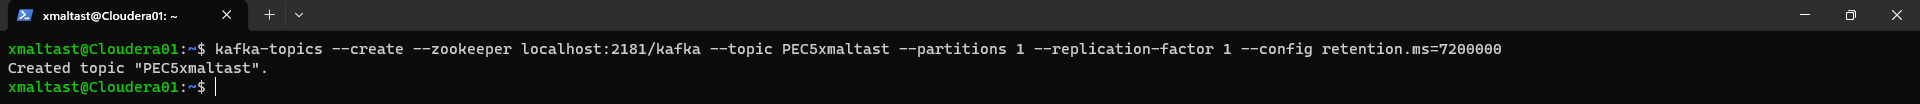


**Pregunta 2. (1 punt)** Consulta el *tòpic* que acabes de crear i mostra'l.

In [ ]:
#List topics
kafka-topics --zookeeper localhost:2181/kafka --list

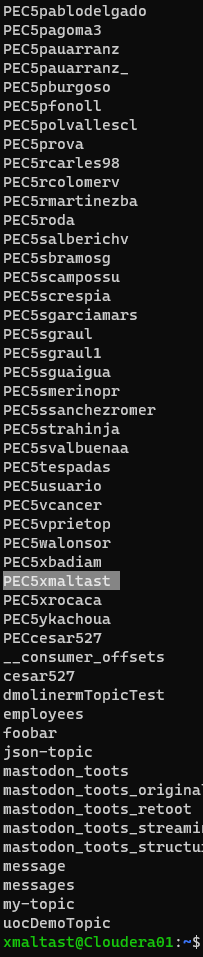

**Pregunta 3. (1 punt)**. Suprimeix el tòpic que acabes de crear.

In [ ]:
#Delete topic
kafka-topics --zookeeper localhost:2181/kafka --delete --topic PEC5xmaltast

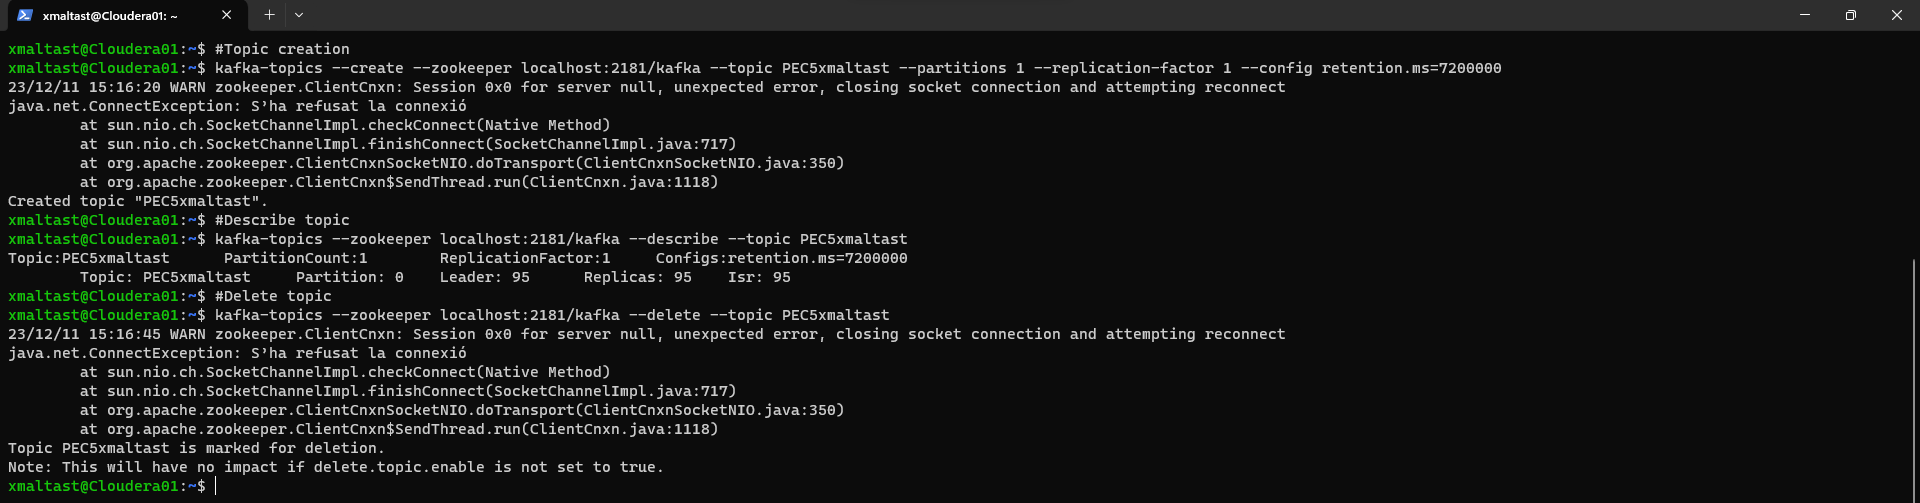

**Pregunta 4. (1 punt)**. Torna a crear el tòpic i mostra la informació detallada del tòpic que hem creat.

In [ ]:
#Describe topic
kafka-topics --zookeeper localhost:2181/kafka --describe --topic PEC5xmaltast

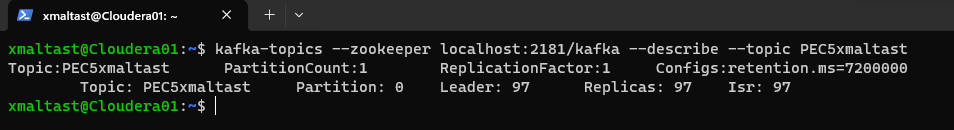

Observa detalladament la informació que mostra i comenta-la.

Mosta el nom del topic, una única partició amb un únic factor de replicació i les dades a la partició del tema estaran retingudes durant 7.200.000 mil·lisegons (o 2 hores) abans de ser eliminades. La partició 0 té un líder al node 97, l'única rèplica està també al node 97 i, aquesta rèplica està en sincronització amb el líder.

**Pregunta 5. (1 punt)** Crearem un esdeveniment al tòpic. Recorda que, com la resta de l'activitat, aquesta sentència l'hem d'executar des de la terminal per poder interactuar. Recorda fer `CTRL+c` quan hagis acabat d'enviar missatges.

In [ ]:
#kafka console producer
kafka-console-producer --broker-list Cloudera02:9092,Cloudera03:9092 --topic PEC5xmaltast

**Pregunta 6. (1 punt)** Finalment, es demana consultar els missatges enviats des del terminal mitjançant el programa consumidor de *tòpics* que incorpora Kafka. Específicament, es demana executar un consumidor connectant als diversos *brokers* existents i indicant el *tòpic* i la partició a la qual s'han enviat. Pots obrir dues terminals i verificar que els missatges que s'envien amb el productor al *broker* es poden consultar amb el consumidor de consola.

In [ ]:
#kafka console consumer
kafka-console-consumer --bootstrap-server Cloudera02:9092,Cloudera03:9092 --topic PEC5xmaltast

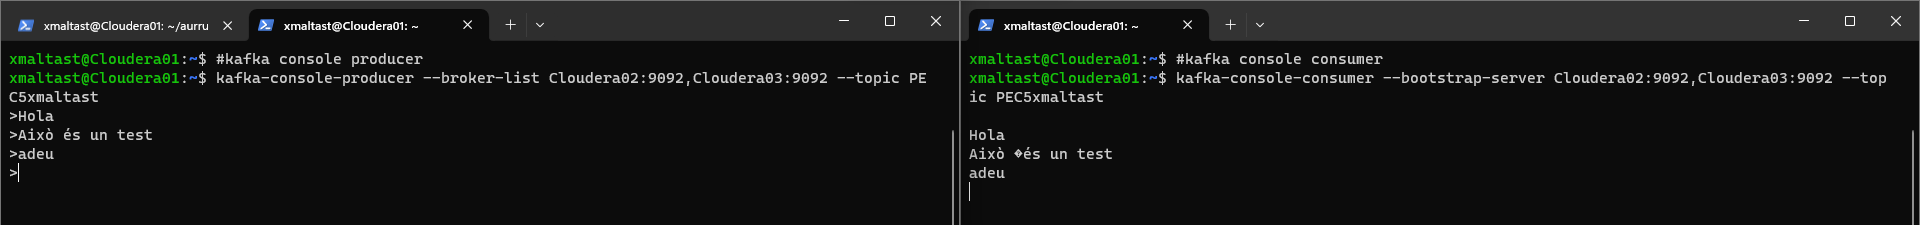

**Pregunta 7. (1 punt)**

Per automatitzar la generació i consum de dades, és habitual treballar mitjançant algun llenguatge de programació, com ara Python, en lloc de fer-ho directament a través de Bash. A continuació, utilitzarem Kafka a través de Python i la llibreria per defecte que **NO HEU D'INSTAL·LAR JA QUE JA ESTÀ DISPONIBLE A LA VERSIÓ CORRECTA**. Podeu trobar tota la documentació associada a l'API proporcionada a [Kafka](https://kafka-python.readthedocs.io/en/master/). Començarem pels conceptes més bàsics que ja hem treballat: escriure en el tòpic que hem creat. Per això configurarem un [Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) que inserirà valors numèrics en un tòpic de Kafka cada 3 segons. Mentre el productor escriu, procedirem a llegir els missatges a l'exercici 8.

Es demana escriure una seqüència numèrica de 300 números (de l'1 al 300) en el tòpic `PEC5<usuari>` de Kafka que acabem de crear. Cadascun dels missatges que escrivim al tòpic ha de contenir informació sobre el tòpic on s'escriu, una clau i el valor binari del valor a escriure (p. ex. value=b'287'). És fonamental revisar l'API associada al [Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) per realitzar els exercicis.

Insistim en l'ús de la llibreria per defecte de Python per accedir a [Kafka](https://kafka-python.readthedocs.io/en/master/), **NO HEU D'INSTAL·LAR-LA JA QUE JA ESTÀ DISPONIBLE LA VERSIÓ CORRECTA**.

**Esquema**
```Python
from kafka import KafkaProducer
import numpy as np
<FILL_IN>
for i in range(1,300):
    <FILL_IN>
producer.flush()
```

In [ ]:
from kafka import KafkaProducer
import numpy as np
import time

producer = KafkaProducer(bootstrap_servers=['Cloudera02:9092', 'Cloudera03:9092'])

for i in range(1, 300):
    value = np.binary_repr(i).encode('utf-8')
    producer.send('PEC5xmaltast', value=value)
    print(value)
    #time.sleep(3)

producer.flush()

**Pregunta 8. (1 punt)**

Mitjançant la biblioteca de Python per a [Kafka](https://kafka-python.readthedocs.io/en/master/), **NO HEU D'INSTAL·LAR-LA JA QUE JA ESTÀ DISPONIBLE LA VERSIÓ CORRECTA**, llegiu els missatges enviats a l'exercici 7 mostrant exclusivament els valors, sense les altres propietats del missatge. És important revisar l'ús de Kafka mitjançant [Python](https://kafka-python.readthedocs.io/en/master/usage.html) i els paràmetres del [Kafka consumer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaConsumer.html).
**Esquema**
```Python
from kafka import KafkaConsumer
<FILL_IN>
for message in consumer:
    <FILL_IN>
```


In [ ]:
from kafka import KafkaConsumer

consumer = KafkaConsumer('PEC5xmaltast', bootstrap_servers=['Cloudera02:9092', 'Cloudera03:9092'], auto_offset_reset="smallest")

for message in consumer:
    print(message)

# Lectura de dades reals d'OpenSky
## (Puntuació: 30% de l'Activitat Kafka)

En aquesta part de la pràctica treballarem l'adquisició de dades en temps real de [OpenSky](https://opensky-network.org/). OpenSky Network és una associació sense ànim de lucre amb seu a Suïssa que ofereix accés obert a les dades de control de seguiment de vols. Va ser creat com un projecte de recerca per diverses universitats i entitats governamentals amb l'objectiu de millorar la seguretat, la fiabilitat i l'eficiència de l'espai aeri. La seva funció principal és recopilar, processar i emmagatzemar dades de control de trànsit aeri i proporcionar accés obert a aquestes dades al públic. Fonamentalment, les dades dels avions s'obtenen via satèl·lit mitjançant l'Automatic Dependent Surveillance–Broadcast (ADS–B). Per a realitzar aquest exercici, no és necessari registrar-se al sistema OpenSky, ja que realitzarem crides d'informació a baixa freqüència, sobre la superfície d'Espanya cada 10 segons. L'API està disponible a aquest [enllaç](https://openskynetwork.github.io/opensky-api/python.html). El paràmetre bbox és una tupla que indica la latitud mínima, màxima, i les longituds mínimes i màximes.

Primerament, utilitzarem el servei OpenSkyApi per llegir un rectangle amb les latituds i longituds que engloben la península ibèrica.

Per fer-ho, heu de [instal·lar](https://github.com/openskynetwork/opensky-api) la biblioteca al vostre directori del servidor Cloudera.

1. Baixeu el repositori en format .zip.
2. Pugeu el zip al vostre directori personal del servidor de Cloudera.
3. Descomprimeu-lo.
4. Dins del directori que ha creat, executeu `pip install -e ./python`.

Un cop instal·lat el mòdul anterior, la següent cel·la us mostrarà els vols registrats sobre la península ibèrica en aquests moments. Observeu amb deteniment les propietats del diccionari de cada vol.

L'API d'OpenSky té algunes restriccions en el seu ús, podeu consultar-les [aquí](https://openskynetwork.github.io/opensky-api/rest.html#limitations). Aquestes restriccions es limiten a 100 peticions al dia per als usuaris sense registre. En cas que no en tinguin prou per completar els vostres exercicis, heu de registrar-vos en el sistema perquè se us faciliti un usuari i contrasenya.

In [ ]:
import json
from random import sample

from opensky_api import OpenSkyApi
#api = OpenSkyApi()
api = OpenSkyApi('<user>', '<password>')

#alternativamente para evitar limitaciones de rate
#api = OpenSkyApi('USUARIO', 'PASSWORD')
states = api.get_states(bbox=(36.173357, 44.024422,-10.137019, 1.736138))
#recuperamos codigo, pais_origen, long, lat, altitud, velocidad, ratio_vertical
#atención en este ejemplo solo estamos mostrando 5 vuelos aleatorios, 
#en vuestros ejercicios deberéis eliminar la función sample
for s in sample(states.states,5):
    vuelo_dict = {
                'callsign':s.callsign,
                'country': s.origin_country,
                'longitude': s.longitude,
                'latitude': s.latitude,
                'velocity': s.velocity,
                'vertical_rate': s.vertical_rate,
            }
    vuelo_encode_data = json.dumps(vuelo_dict, indent=2).encode('utf-8')
    print("(%r, %r,%r, %r, %r, %r)" % (s.callsign, s.origin_country, s.longitude, s.latitude,s.velocity,s.vertical_rate))

Sortida d'exemple:

`('BAW457  ', 'United Kingdom',-3.5196, 40.4292, 86.45, 10.73)
('BLX245  ', 'Sweden',-6.0307, 43.8266, 252.51, 0)
('CFG1HE  ', 'Germany',-8.4689, 40.2967, 236.56, 0)
('TOM3MK  ', 'United Kingdom',-7.2687, 41.5878, 247.02, 0)
('AEA57MC ', 'Spain',-0.5364, 38.2791, 64.7, -3.9)`

Ara crearem un programa en Python per enviar un missatge al nostre broker de Kafka cada 10 segons per a cada vol sobre la península ibèrica.

**NOTA**: heu de fer servir el mateix tema que heu utilitzat abans, assegurant-vos que no conté cap missatge anterior. Per evitar que les dades es barregin entre exercicis, podeu esborrar i crear el tema de nou.

**Pregunta 9. (1 punt)** Modifica el programa Python per enviar missatges a Kafka amb les dades dels vols en format JSON. Podeu fer servir la funció [json.dumps](https://docs.python.org/3/library/json.html), que us permet crear una representació JSON de cada diccionari amb les propietats del vol.

Recordeu com heu creat el productor als exercicis anteriors.

In [ ]:
#START <FILL IN>
from time import sleep
import socket
import json
from opensky_api import OpenSkyApi
from kafka import KafkaProducer

#api = OpenSkyApi()

#alternativamente para evitar limitaciones de rate
#api = OpenSkyApi('USUARIO', 'PASSWORD')

api = OpenSkyApi('<user>', '<password>')
producer=KafkaProducer(bootstrap_servers=<FILL IN>)

while True:
    while(True):
        v = {}
        states = api.get_states(bbox=(36.173357, 44.024422,-10.137019, 1.736138))
        if states is not None:
            for vuelo in states.states:
# YOUR CODE HERE
raise NotImplementedError()
                print(v)
                producer.send(<FILL IN>,key=b'UOC', value=bytes(str(v),'utf-8'))
        sleep(10)
        producer.flush() 
#END <FILL IN>

# Video resposta 
## (Puntuació: 40% de l'Activitat Kafka)

En aquest apartat caldrà respondre les qüestions que es mostren a continuació mitjançant una resposta en vídeo d'entre 3 i 5 minuts. Heu de realitzar una gravació en la qual es us vegi la cara mentre responeu amb les vostres pròpies paraules a les qüestions. Heu de seguir els següents punts per fer el vídeo (4 punts):

1. Al principi del vídeo heu de dir el vostre nom i DNI mentre mostreu el DNI (el qual ha de ser visible amb claredat i llegible).

2. Heu de respondre a les preguntes en l'ordre en què estan, comentant sempre a l'inici de cada resposta a quina pregunta us esteu referint.

3. En cas de no respondre a alguna pregunta, heu d'indicar el número de la pregunta a la qual no responeu i el perquè.

# Preguntes:

1. Explica els diferents orígens de dades que permet Apache Flume. Explica, segons el teu criteri, quins són els més habituals i posa un cas d'ús de cadascun d'ells.
2. Familiaritza't amb la comanda avro de la línia de comandament Linux (veure: avro --help). Mostra la informació disponible (esquema, nombre d'elements, etc.) de l'arxiu emmagatzemat a la pregunta 4 dels exercicis de Flume. Comenta la informació en el vídeo. Quines avantatges presenta un format binari com AVRO sobre altres formats textuals?
3. Fes una breu presentació explicant les principals diferències entre Kafka i Flume.
4. Explica quina funcionalitat té el paràmetre 'key' per enviar des del KafkaProducer. Quin efecte té si sempre posem la mateixa clau per a tots els nostres missatges? Hauria de canviar això? Per què?
5. Què és KSQL? Què ens permetria fer?
6. En l'exercici 8 de Kafka heu emmagatzemat diversa informació de vols a Kafka. Explica i mostra com podem consultar aquesta informació.


**1 -** Els tipus de fonts més utilitzats i importants d’Apache Flume són:
- **Exec source** : Permet a Flume executar comandes externes i capturar les seves sortides. És molt útil per a monitoritzar processos.

- **Kafka source** : Aquesta font permet a Flume consumir dades de topics de Kafka. És útil quan volem integrar dades emmagatzemades en un clúster de Kafka a la pipeline de Flume. 

- **Twitter 1% firehose source** : Aquesta font de dades està dissenyada per a la recollida de dades en temps real de Twitter, proporcionant un subconjunt del ‘firehose’ (tothom) amb un límit del 1%. És útil per analitzar tendències i patrons en temps real a partir dels tuits que es publiquen a Twitter.

**2 -** El format binari Apache Avro és un format de serialització de dades binari que ofereix diversos avantatges respecte altres formats com JSON o XML, especialment en contextos de sistemes distribuïts, processament de dades en temps real, etc.
Està especialment dissenyat per ser un format compacte, ràpid i eficient en termes d’espai, ja que les dades s’emmagatzemen en binari. Les operacions de lectura i escriptura són molt més ràpides ja que no es requereix de procés de parsing. L’ús de formats binaris i textuals dependrà de les necessitats específiques de cada sistema.

**3 -** Apache Kafka és un magatzem de dades distribuït optimitzat per ingerir i processar dades de transmissió en temps real i Apache Flume és un sistema distribuït, fiable i disponible per recopilar, agregar i traslladar de manera eficient grans quantitats de dades de registre de moltes fonts diferents a un magatzem de dades centralitzat.

- **Flux de dades**:
    - Flume: Utilitza una arquitectura basada en agents, on els agents Flume recopilen, processen i transfereixen dades de manera independent.
    - Kafka: Utilitza un model publish-subscribe on les dades es divideixen en temes i les aplicacions poden subscriure's per rebre les dades.

- **Latència i escalabilitat**:
    - Flume: És adequat per a casos d'ús amb baixa latència i petits volums de dades i no és escalable com Kafka.
    - Kafka: És conegut per la seva elevada escalabilitat i eficiència, i és apropiat per a casos d'ús amb altes velocitats de transmissió i grans volums de dades.
    
- **Push/Pull**:
    - Flume: Funciona bàsicament com a model push
    - Kafka: Treballa bàsicament com a model pull
    
- **Processament d'esdeveniments**:
    - Flume: Es centra més en la recopilació i el moviment de dades que en el processament d'esdeveniments.
    - Kafka: S'ha convertit en una plataforma popular per al processament d'esdeveniments en temps real amb l'ús de connectors i llibreries associades.
    
- **Semàntica d'ordre**:
    - Flume: Garanteix l'ordre en la transferència de dades entre els agents, però no necessàriament entre diferents canals.
    - Kafka: Garanteix l'ordre de les dades en una partició, que és la unitat de sharding en Kafka. Aquesta semàntica d'ordre és clau per a molts casos d'ús.
    
- **Flexibilitat**:
    - Flume:Està especialment dissenyat per a Hadoop
    - Kafka: És un sistema de missatgeria model de publicació i subscripció de propòsit general
    
- **Recuperabilitat**:
    - Flume: En cas de fallada de l'agent flume, es perden esdeveniments al canal
    - Kafka: És altament disponible i resistent als errors de nodes i admet la recuperació automàtica


**4 -** En Kafka, el paràmetre 'key' que es pot enviar des del KafkaProducer es refereix a la clau associada a un missatge o registre específic que es produeix o es produïrà. La 'key' és una manera d'identificar unívocament cada missatge dins d'un topic i pot ser utilitzada pel sistema per determinar en quina partició del tema s'ha de col·locar aquest missatge. 

Si sempre es posa la mateixa 'key' per a tots els missatges i aquests missatges es produeixen a través d'un KafkaProducer, això comportarà que tots aquests missatges es col·locaran a la mateixa partició dins del topic especificat.

Això provoca que tots els missatges amb la mateixa clau van a la mateixa partició, la distribució de missatges entre les particions del tema no serà equitativai ,per tant, podria provocar un desequilibri en la càrrega dels consumidors que estan llegint d'aquest tema, ja que només una partició rebrà la majoria dels missatges.
També pot provocar en una pèrdua de paral·lelisme en el consumidor. Diferents consumidors en el mateix grup podrien processar missatges a un ritme diferent si la càrrega de particions no està equitativament distribuïda. 

Finalment, si es busca processar missatges en ordre utilitzant la clau com a factor de partició, enviar tots els missatges amb la mateixa clau a una sola partició assegurarà aquest ordre. No obstant això, això podria conduir a temps de processament inconsistent si aquesta única partició es converteix en un embús.

**5 -** KSQL és una interfície de llenguatge de consulta declarativa i interactiva desenvolupada per Confluent. Aquesta eina proporciona una manera senzilla de consultar i processar dades en temps real emmagatzemades a Apache Kafka utilitzant un llenguatge similar a SQL. Destaquem algunes de les característiques i funcionalitats de KSQL com poden ser:

- Permet realitzar consultes en temps real a les dades emmagatzemades a Apache Kafka.
- Utilitza un llenguatge similar a SQL per a les consultes.
- Es poden realitzar operacions de transformació i filtratge sobre les dades en moviment, creant consultes per fer agrupacions, joins, filtres i altres operacions en temps real.
- Està construït sobre la llibreria Apache Kafka Streams, que permet el processament d'esdeveniments en temps real.
- Ofereix una interfície d'usuari interactiva que permet als usuaris explorar i provar les consultes en temps real.
- Es pot integrar fàcilment amb altres eines i plataformes, com Apache Kafka Connect.